# Project: Capital Bike

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Get Data and merge into one dataframe

In [3]:
year19 = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [4]:
df_years = pd.DataFrame()
for year in year19: 
    df_year = pd.read_csv(f"data/2019{year}.csv", parse_dates=True)
    df_years  = df_years.append(df_year)

In [5]:
year18 = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [6]:
df_18 = pd.DataFrame()
for year in year18: 
    df_y = pd.read_csv(f"data/2018/2018{year}.csv", parse_dates=True)
    df_18  = df_18.append(df_y)

In [7]:
year20 = ["1", "2", "3",]

In [8]:
df_20 = pd.DataFrame()
for year in year20: 
    df_y = pd.read_csv(f"data/2020/2020{year}.csv", parse_dates=True)
    df_20  = df_20.append(df_y)

In [9]:
df2 = df_18.append(df_years, sort=False)

In [10]:
df = df2.append(df_20)

In [ ]:
### Location data

In [ ]:
df_locations = pd.read_csv("../data/Capital_Bike_Share_Locations.csv")

In [ ]:
df_loc = df_locations[["ADDRESS", "TERMINAL_NUMBER", "LATITUDE", "LONGITUDE"]].copy()

In [ ]:
df_loc.to_csv("data/df_loc.csv")

In [ ]:
### Weather data

In [61]:
df_weather = pd.read_csv("data/weather_all.csv")

In [16]:
df.isnull().sum()  #-> missing data only for "bike-number"

Duration                 0
Start date               0
End date                 0
Start station number     0
Start station            0
End station number       0
End station              0
Bike number             14
Member type              0
dtype: int64

## Prep for map

In [12]:
df["Start date"] = pd.to_datetime(df["Start date"])

In [74]:
df["year"] = df["Start date"].apply(lambda x: x.year)

In [75]:
df["month"] = df["Start date"].apply(lambda x: x.month)

In [76]:
df["day"] = df["Start date"].apply(lambda x: x.date())

In [77]:
df["hour"] = df["Start date"].apply(lambda x: x.hour)

## Most used station

In [ ]:
df[df["month"]==12].groupby("Start station number").count()["Start station"].sort_values()[-1:].index[0]  #.iloc[0]

In [ ]:
df_loc[df_loc["TERMINAL_NUMBER"] == no]["ADDRESS"].iloc[0]

## From station to station

In [37]:
df_stations = df.groupby(["Start station", "End station", "year"]).count()

In [38]:
df_stations.reset_index(inplace=True) 

In [42]:
df_stations = df_stations[df_stations["Duration"]>3000]

In [46]:
df_stations[["Start station", "End station", "Duration"]].to_csv("data/df_stations.csv")

## Weekdays

In [89]:
df['weekday'] = df["Start date"].apply(lambda x: x.weekday())

In [90]:
df["weekday"] = df["weekday"].map({0:"Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [33]:
#check:
df[df["day"] == pd.to_datetime("2019-4-2").date()]  #should be Tuesday

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,year,month,day,hour,weekday
8865,166,2019-04-02 00:00:14,2019-04-02 00:03:00,31203,14th & Rhode Island Ave NW,31267,17th St & Massachusetts Ave NW,W23371,Member,2019,4,2019-04-02,0,Tuesday
8866,126,2019-04-02 00:00:49,2019-04-02 00:02:56,31203,14th & Rhode Island Ave NW,31267,17th St & Massachusetts Ave NW,W20734,Member,2019,4,2019-04-02,0,Tuesday
8867,418,2019-04-02 00:02:43,2019-04-02 00:09:42,31203,14th & Rhode Island Ave NW,31266,11th & M St NW,W20108,Member,2019,4,2019-04-02,0,Tuesday
8868,405,2019-04-02 00:03:20,2019-04-02 00:10:05,31227,13th St & New York Ave NW,31519,1st & O St NW,75663,Member,2019,4,2019-04-02,0,Tuesday
8869,393,2019-04-02 00:03:37,2019-04-02 00:10:11,31308,39th & Veazey St NW,31320,American University East Campus,W21063,Casual,2019,4,2019-04-02,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,3146,2019-04-02 23:58:40,2019-04-03 00:51:07,31401,14th St & Spring Rd NW,31603,1st & M St NE,W23455,Casual,2019,4,2019-04-02,23,Tuesday
16756,694,2019-04-02 23:58:47,2019-04-03 00:10:22,31314,34th & Water St NW,31110,20th St & Florida Ave NW,W23219,Member,2019,4,2019-04-02,23,Tuesday
16757,3132,2019-04-02 23:58:51,2019-04-03 00:51:03,31401,14th St & Spring Rd NW,31603,1st & M St NE,W00374,Casual,2019,4,2019-04-02,23,Tuesday
16758,232,2019-04-02 23:59:01,2019-04-03 00:02:54,31089,Court House Metro / 15th St & N Uhle St,31029,N Veitch St & 20th St N,W00461,Member,2019,4,2019-04-02,23,Tuesday


## Rush hour, night, day

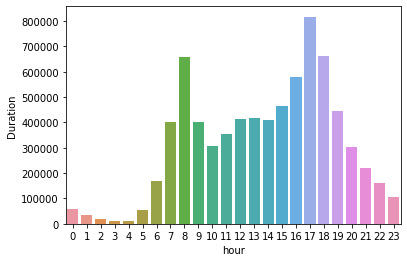

In [35]:
sns.barplot(df.groupby("hour").count().index, df.groupby("hour").count()["Duration"])

In [97]:
d = {0:'night', 1:'night', 2:'night', 3:'night', 4:'night', 5:'night', 6:'night', 7:'day', 8:'rush', 9:'day', 10:'day', 11:'day', 12:'day', 13:'day', 14:'day', 15:'day', 16:'day', 17:'rush', 18:'rush', 19:'day', 20:'day', 21:'day', 22:'night', 23:'night'}
df['hour_binned'] = df['hour'].map(d)

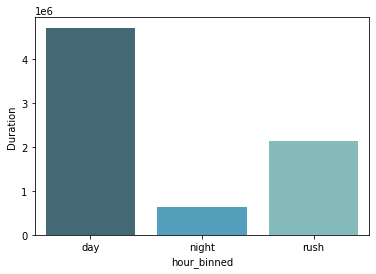

In [37]:
sns.barplot(df.groupby("hour_binned").count().index, df.groupby("hour_binned").count()["Duration"], palette="GnBu_d")

### Hour by weekday

In [80]:
df["date_by_day"] = df["Start date"].apply(lambda x: x.day)

In [81]:
df["date_by_hour"] = df["Start date"].apply(lambda x: x.replace(microsecond=0, second=0, minute=0))

In [82]:
df_count = df.groupby("date_by_hour").count().reset_index()

In [83]:
df_count["weekday"] = df_count["date_by_hour"].apply(lambda x: x.weekday())

In [84]:
df_count["weekday"] = df_count["weekday"].map({0:"Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

In [85]:
df_count["hour"] = df_count["date_by_hour"].apply(lambda x: x.hour)

In [86]:
df_count = df_count[["hour", "Duration", "weekday"]]

In [54]:
df_count.to_csv("data/df_weekday.csv")

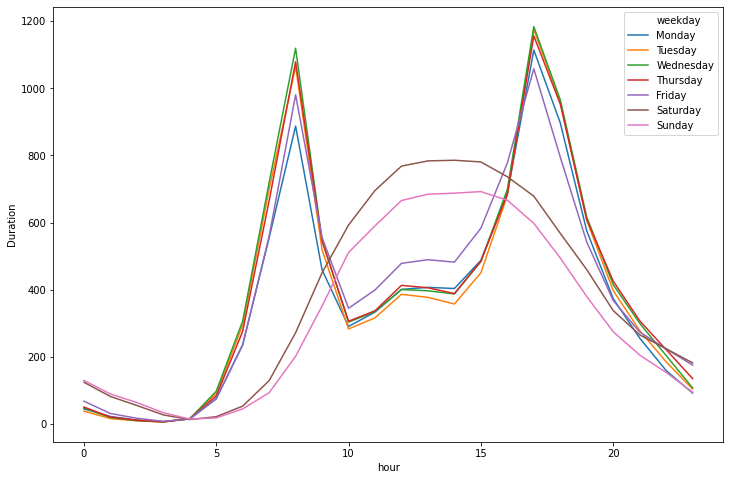

In [55]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df_count["hour"], df_count["Duration"], hue=df_count["weekday"], ci=None)

## Weather

- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- TAVG = Average Temperature in Fahrenheit
- AWND = Average daily wind speed (meters per second)


In [63]:
#get data for Washington D.C.
df_w = df_weather[df_weather["NAME"].str.match('WASHINGTON')]

In [64]:
df_wd = df_w.groupby("DATE").mean()
df_wd = df_wd[["AWND", "PRCP", "TAVG"]]

In [66]:
# convert Fahrenheit to celsius:
df_wd["TAVG"] = df_wd["TAVG"].apply(lambda x: round(((x-32)*(5/9)),2))
df_wd.reset_index(inplace=True) 

In [68]:
df_wd = df_wd.rename(columns={"DATE": "day"})
df_wd["day"] = df_wd["day"].apply(lambda x: pd.to_datetime(x).date())

In [70]:
df_wd.to_csv("data/df_weather.csv")

In [101]:
df_plus = pd.merge(df, df_wd, how="left", on="day")

In [150]:
# new column for weather-graph
def date_formatting(date):
    if date < 10:
        date = "0"+ str(date)
    return str(date)

In [151]:
df_plus["temp"] = df_plus["month"].apply(lambda x: date_formatting(x))
df_plus["temp1"] = df_plus["date_by_day"].apply(lambda x: date_formatting(x))

In [152]:
df_plus["day_month"] = df_plus["temp1"] + "." + df_plus["temp"]

In [169]:
df_plus["day_month"] = df_plus["day_month"].astype(str)

In [156]:
df_plus = df_plus.drop(["temp", "temp1"], axis=1)

### Weather and duration

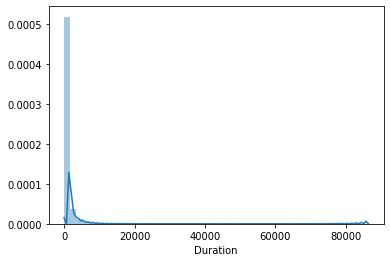

In [72]:
sns.distplot(df_plus["Duration"])

In [158]:
df_plus.loc[(df_plus["Duration"]<=300), "Duration_bins"] = "0 to5"
df_plus.loc[(df_plus["Duration"]<=600) & (df_plus["Duration"] > 300), "Duration_bins"] = "05 to10"
df_plus.loc[(df_plus["Duration"]<=900) & (df_plus["Duration"] > 600), "Duration_bins"] = "10 to 15"
df_plus.loc[(df_plus["Duration"]<=1800) & (df_plus["Duration"] > 900), "Duration_bins"] = "15 to 30"
df_plus.loc[(df_plus["Duration"]<=3600) & (df_plus["Duration"] > 1800), "Duration_bins"] = "30 to 60"
df_plus.loc[(df_plus["Duration"]<=5400) & (df_plus["Duration"] > 3600), "Duration_bins"] = "60 to 90"
df_plus.loc[df_plus["Duration"] > 5400, "Duration_bins"] = "90 or more"

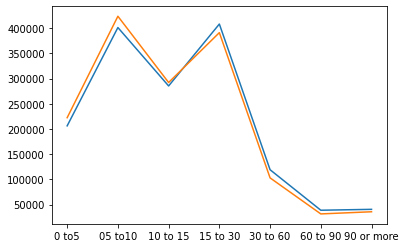

In [159]:
plt.plot(df_plus[df_plus["PRCP"]==0][:1500000].groupby("Duration_bins").count()["Duration"].index, df_plus[df_plus["PRCP"]==0][:1500000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["PRCP"]>0][:1500000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["PRCP"]>0)][:1500000].groupby("Duration_bins").count()["Duration"])

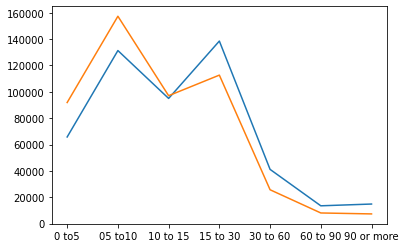

In [160]:
plt.plot(df_plus[df_plus["AWND"]<5][:500000].groupby("Duration_bins").count()["Duration"].index, df_plus[df_plus["AWND"]<5][:500000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["AWND"]>5][:500000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["AWND"]>5)][:500000].groupby("Duration_bins").count()["Duration"])

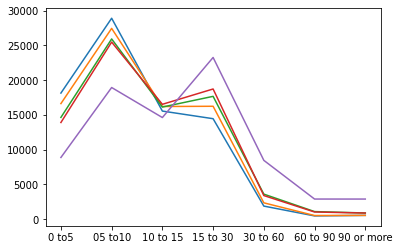

In [161]:
plt.plot(df_plus[df_plus["TAVG"]<0][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[df_plus["TAVG"]<0][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>0][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>0) & (df_plus["TAVG"]<5)][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>5][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>5) & (df_plus["TAVG"]<10)][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>10][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>10) & (df_plus["TAVG"]<20)][:80000].groupby("Duration_bins").count()["Duration"])
plt.plot(df_plus[df_plus["TAVG"]>20][:80000].groupby("Duration_bins").count()["Duration"].index, df_plus[(df_plus["TAVG"]>20)][:80000].groupby("Duration_bins").count()["Duration"])

## Members & Casual Riders

In [119]:
df_members = df_plus[df_plus["Member type"] == "Member"]

In [122]:
df_casual = df_plus[df_plus["Member type"] == "Casual"]

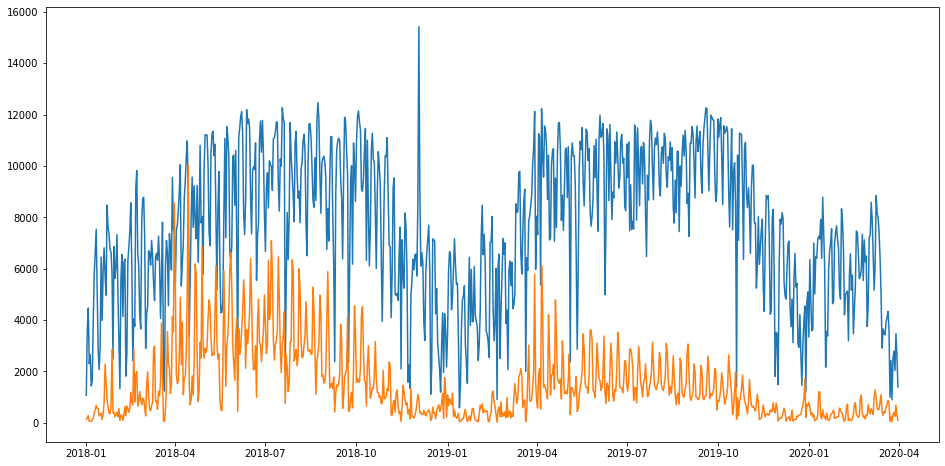

In [168]:
plt.figure(figsize=(16,8))
plt.plot(df_members.groupby(["day"]).count()["Duration"].index, df_members.groupby(["day"]).count()["Duration"])
plt.plot(df_casual.groupby(["day"]).count()["Duration"].index, df_casual.groupby(["day"]).count()["Duration"])

In [171]:
df_plus.to_csv("data/df_main.csv")